In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rtt(s, labels=None):
    lines = filter(None, s.strip().split('\n'))
    
    def stonumber(s):
        try:
            return int(s)
        except ValueError:
            try:
                return float(s)
            except ValueError:
                return s
        
    def parse_line(line):
        return list(map(stonumber, filter(None, line.replace('&', '').replace('\\', '').split(' '))))
    
    data = list(map(parse_line, lines))
    
    return pd.DataFrame(data, columns=labels)

In [3]:
single_tests_s = """
  5 & ArrayDeque          & 95.235 & 476.175 & 0.011 & 0.0022 \\
  5 & LinkedBlockingQueue & 90.824 & 454.120 & 0.011 & 0.0022 \\
  5 & LinkedList          & 93.824 & 469.120 & 0.011 & 0.0022 \\
 10 & ArrayDeque          & 48.769 & 487.690 & 0.021 & 0.0021 \\
 10 & LinkedBlockingQueue & 47.291 & 472.910 & 0.021 & 0.0021 \\
 10 & LinkedList          & 48.371 & 483.710 & 0.021 & 0.0021 \\
 50 & ArrayDeque          &  9.623 & 481.150 & 0.105 & 0.0021 \\
 50 & LinkedBlockingQueue &  9.537 & 476.850 & 0.107 & 0.0021 \\
 50 & LinkedList          &  9.761 & 488.050 & 0.104 & 0.0021 \\
100 & ArrayDeque          &  4.929 & 492.900 & 0.211 & 0.0021 \\
100 & LinkedBlockingQueue &  4.419 & 441.900 & 0.220 & 0.0022 \\
100 & LinkedList          &  4.186 & 418.600 & 0.231 & 0.0023 \\
"""
single_tests = rtt(single_tests_s, ['size', 'PacketHolder', 'T', 'T*size', 'L', 'L/size'])
single_tests

size         PacketHolder       T   T*size      L  L/size
0      5           ArrayDeque  95.235  476.175  0.011  0.0022
1      5  LinkedBlockingQueue  90.824  454.120  0.011  0.0022
2      5           LinkedList  93.824  469.120  0.011  0.0022
3     10           ArrayDeque  48.769  487.690  0.021  0.0021
4     10  LinkedBlockingQueue  47.291  472.910  0.021  0.0021
5     10           LinkedList  48.371  483.710  0.021  0.0021
6     50           ArrayDeque   9.623  481.150  0.105  0.0021
7     50  LinkedBlockingQueue   9.537  476.850  0.107  0.0021
8     50           LinkedList   9.761  488.050  0.104  0.0021
9    100           ArrayDeque   4.929  492.900  0.211  0.0021
10   100  LinkedBlockingQueue   4.419  441.900  0.220  0.0022
11   100           LinkedList   4.186  418.600  0.231  0.0023

In [4]:
def plot_single_tests_size(data, yaxis, yaxislabel, shareyaxis, imgname):
    def plot_single_tests_size(sp, size, data, yaxis, yaxislabel):
        tmp = data[data['size'] == size]
        
        x = tmp['PacketHolder'].values
        ix = list(range(len(x)))
        y = tmp[yaxis].values
        
        sp.plot(ix, y, 'x')
        
        sp.xaxis.set_label_text('PacketHolder')
        sp.xaxis.set_ticks(ix)
        sp.xaxis.set_ticklabels(x)
        sp.yaxis.set_label_text(yaxislabel)
        
        sp.set_title('TokenRing.size=%d' % size)
        
    
    f, sps = plt.subplots(2, 2, sharex=False, sharey=shareyaxis)
    
    f.set_figwidth(9)
    f.set_figheight(6)
    
    sizes = sorted(set(data['size']))
    
    for ind, size in enumerate(sizes):
        plot_single_tests_size(sps[ind // 2][ind % 2], size, data, yaxis, yaxislabel)
    
    plt.tight_layout()
    
    plt.savefig(imgname + '.pdf')
    
    plt.show()

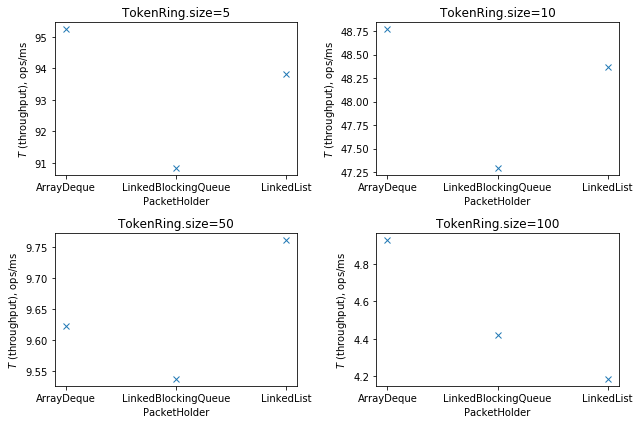

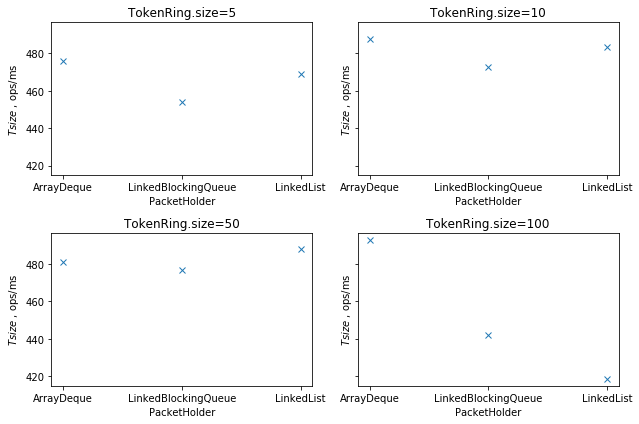

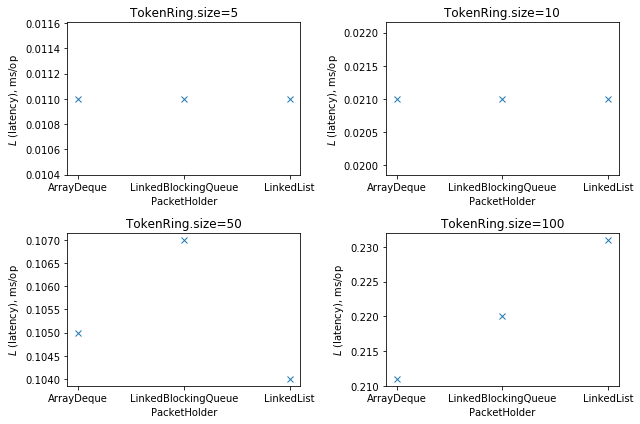

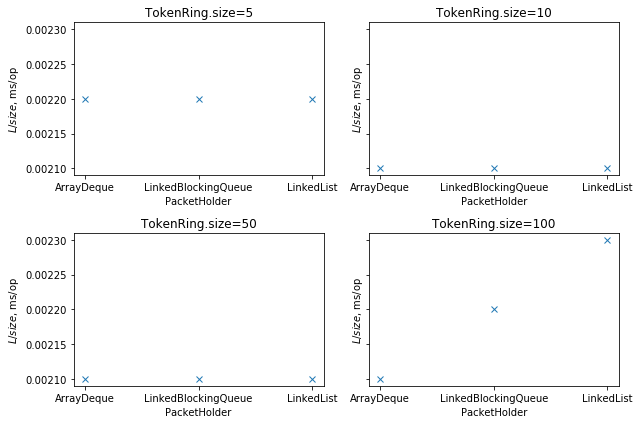

In [5]:
plot_single_tests_size(single_tests, yaxis='T', yaxislabel='$T$ (throughput), ops/ms', shareyaxis=False, imgname='single_sz_T')
plot_single_tests_size(single_tests, yaxis='T*size', yaxislabel='$T size$ , ops/ms', shareyaxis=True, imgname='single_sz_Tsize')
plot_single_tests_size(single_tests, yaxis='L', yaxislabel='$L$ (latency), ms/op', shareyaxis=False, imgname='single_sz_L')
plot_single_tests_size(single_tests, yaxis='L/size', yaxislabel='$L/size$, ms/op', shareyaxis=True, imgname='single_sz_Lsize')

In [6]:
def plot_single_tests_ph(data, yaxis, yaxislabel, shareyaxis, imgname):
    def plot_single_tests_ph(sp, ph, data, yaxis, yaxislabel):
        tmp = data[data['PacketHolder'] == ph]
        
        x = tmp['size'].values
        ix = list(range(len(x)))
        y = tmp[yaxis].values
        
        sp.plot(ix, y, 'x')
        
        sp.xaxis.set_label_text('TokenRing.size')
        sp.xaxis.set_ticks(ix)
        sp.xaxis.set_ticklabels(x)
        sp.yaxis.set_label_text(yaxislabel)
        
        sp.set_title('PacketHolder=%s' % ph)
        
    
    f, sps = plt.subplots(1, 3, sharex=False, sharey=shareyaxis)
    
    f.set_figwidth(9)
    f.set_figheight(3)
    
    packet_holders = sorted(set(data['PacketHolder']))
    
    for ind, ph in enumerate(packet_holders):
        plot_single_tests_ph(sps[ind], ph, data, yaxis, yaxislabel)
    
    plt.tight_layout()
    
    plt.savefig(imgname + '.pdf')
    
    plt.show()

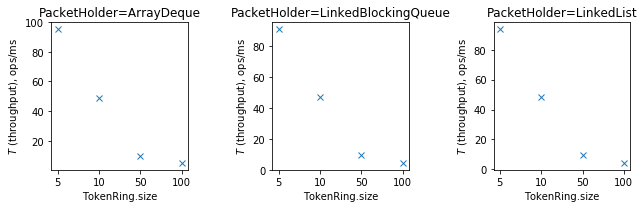

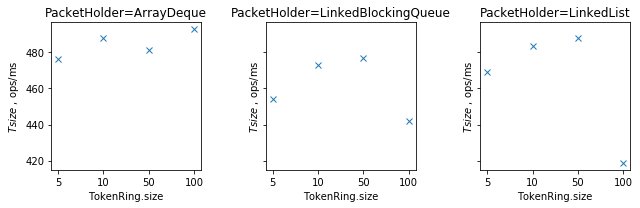

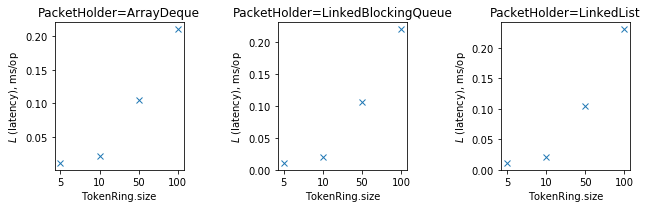

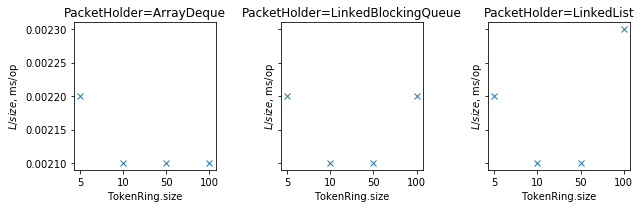

In [7]:
plot_single_tests_ph(single_tests, yaxis='T', yaxislabel='$T$ (throughput), ops/ms', shareyaxis=False, imgname='single_ph_T')
plot_single_tests_ph(single_tests, yaxis='T*size', yaxislabel='$T size$ , ops/ms', shareyaxis=True, imgname='single_ph_Tsize')
plot_single_tests_ph(single_tests, yaxis='L', yaxislabel='$L$ (latency), ms/op', shareyaxis=False, imgname='single_ph_L')
plot_single_tests_ph(single_tests, yaxis='L/size', yaxislabel='$L/size$, ms/op', shareyaxis=True, imgname='single_ph_Lsize')

In [8]:
many_pretests_s = """
10 & ArrayDeque          & 0.157 & 1.570 & 6.835 & 0.683 \\
10 & LinkedBlockingQueue & 0.329 & 3.290 & 8.578 & 0.857 \\
10 & LinkedList          & 0.176 & 1.760 & 5.565 & 0.556 \\
"""
many_pretests = rtt(many_pretests_s, ['size', 'PacketHolder', 'T', 'T*size', 'L', 'L/size'])
many_pretests

size         PacketHolder      T  T*size      L  L/size
0    10           ArrayDeque  0.157    1.57  6.835   0.683
1    10  LinkedBlockingQueue  0.329    3.29  8.578   0.857
2    10           LinkedList  0.176    1.76  5.565   0.556

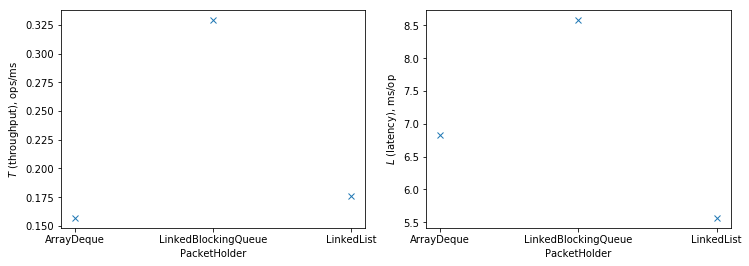

In [9]:
f, (sp1, sp2) = plt.subplots(1, 2, sharex=True)

f.set_figwidth(12)

x = many_pretests['PacketHolder'].values
ix = list(range(len(x)))

y1 = many_pretests['T'].values
y2 = many_pretests['L'].values

sp1.plot(ix, y1, 'x')
sp2.plot(ix, y2, 'x')

plt.xticks(ix, x)

sp1.yaxis.set_label_text('$T$ (throughput), ops/ms')
sp1.xaxis.set_label_text('PacketHolder')
sp2.yaxis.set_label_text('$L$ (latency), ms/op')
sp2.xaxis.set_label_text('PacketHolder')

plt.savefig('many_pretests.pdf')

plt.show()

In [10]:
many_tests_s = """
  5 &    0 & 90.824  & 454.12 &   0.011 & 0.0022 \\
  5 &  0.5 & 98.639 & 493.195 &   0.010 & 0.0020 \\
  5 &    1 & 97.412 & 487.060 &   0.010 & 0.0020 \\
  5 &   10 & 37.901 & 189.505 &   0.028 & 0.0056 \\
  5 &  100 &  7.752 &  38.760 &   0.127 & 0.0254 \\
  5 & 1000 &  6.923 &  34.615 &   0.257 & 0.0514 \\
 10 &    0 & 47.291  & 472.91 &   0.021 & 0.0021 \\
 10 &  0.5 & 45.726 & 457.260 &   0.023 & 0.0023 \\
 10 &    1 & 43.705 & 437.050 &   0.023 & 0.0023 \\
 10 &   10 &  8.753 &  87.530 &   0.111 & 0.0111 \\
 10 &  100 &  1.092 &  10.920 &   0.936 & 0.0936 \\
 10 & 1000 &  0.292 &   2.920 &   5.428 & 0.5428 \\
 50 &    0 &  9.537  & 476.85 &   0.107 & 0.0021 \\
 50 &  0.5 &  5.677 & 283.850 &   0.177 & 0.0035 \\
 50 &    1 &  3.678 & 183.900 &   0.279 & 0.0056 \\
 50 &   10 &  0.322 &  16.100 &   3.327 & 0.0665 \\
 50 &  100 &  0.034 &   1.700 &  35.918 & 0.7184 \\
 50 & 1000 &  0.004 &   0.200 & 241.726 & 4.8345 \\
100 &    0 &  4.419 & 441.900 &   0.220 & 0.0022 \\
100 &  0.5 &  1.751 & 175.100 &   0.569 & 0.0057 \\
100 &    1 &  0.983 &  98.300 &   1.166 & 0.0117 \\
100 &   10 &  0.062 &   6.200 &  16.362 & 0.1636 \\
100 &  100 &  0.007 &   0.700 & 148.664 & 1.4866 \\
100 & 1000 &  0.001 &   0.100 & 987.878 & 9.8788 \\
"""
many_tests = rtt(many_tests_s, ['size', 'ppn', 'T', 'T*size', 'L', 'L/size'])
many_tests

size     ppn       T   T*size        L  L/size
0      5     0.0  90.824  454.120    0.011  0.0022
1      5     0.5  98.639  493.195    0.010  0.0020
2      5     1.0  97.412  487.060    0.010  0.0020
3      5    10.0  37.901  189.505    0.028  0.0056
4      5   100.0   7.752   38.760    0.127  0.0254
5      5  1000.0   6.923   34.615    0.257  0.0514
6     10     0.0  47.291  472.910    0.021  0.0021
7     10     0.5  45.726  457.260    0.023  0.0023
8     10     1.0  43.705  437.050    0.023  0.0023
9     10    10.0   8.753   87.530    0.111  0.0111
10    10   100.0   1.092   10.920    0.936  0.0936
11    10  1000.0   0.292    2.920    5.428  0.5428
12    50     0.0   9.537  476.850    0.107  0.0021
13    50     0.5   5.677  283.850    0.177  0.0035
14    50     1.0   3.678  183.900    0.279  0.0056
15    50    10.0   0.322   16.100    3.327  0.0665
16    50   100.0   0.034    1.700   35.918  0.7184
17    50  1000.0   0.004    0.200  241.726  4.8345
18   100     0.0   4.419  441.900    0.220  0.0022
19   100     0.5   1.751  175.100    0.569  0.0057
20   100     1.0   0.983   98.300    1.166  0.0117
21   100    10.0   0.062    6.200   16.362  0.1636
22   100   100.0   0.007    0.700  148.664  1.4866
23   100  1000.0   0.001    0.100  987.878  9.8788

In [11]:
def plot_many_tests_size(data, yaxis, yaxislabel, shareyaxis, imgname):
    def plot_many_tests_size(sp, size, data, yaxis, yaxislabel):
        tmp = data[data['size'] == size]
        
        x = tmp['ppn'].values
        ix = list(range(len(x)))
        y = tmp[yaxis].values
        
        sp.plot(ix, y, 'x')
        
        sp.xaxis.set_label_text('packets per node, ppn')
        sp.xaxis.set_ticks(ix)
        sp.xaxis.set_ticklabels(x)
        sp.yaxis.set_label_text(yaxislabel)
        
        sp.set_title('TokenRing.size=%d' % size)
        
    
    f, sps = plt.subplots(2, 2, sharex=False, sharey=shareyaxis)
    
    f.set_figwidth(9)
    f.set_figheight(6)
    
    sizes = sorted(set(data['size']))
    
    for ind, size in enumerate(sizes):
        plot_many_tests_size(sps[ind // 2][ind % 2], size, data, yaxis, yaxislabel)
    
    plt.tight_layout()
    
    plt.savefig(imgname + '.pdf')
    
    plt.show()

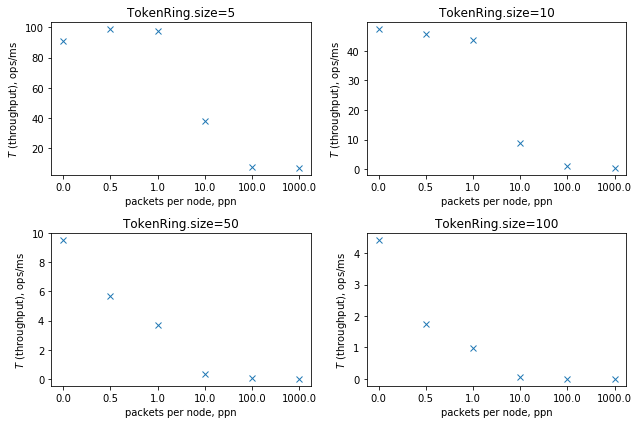

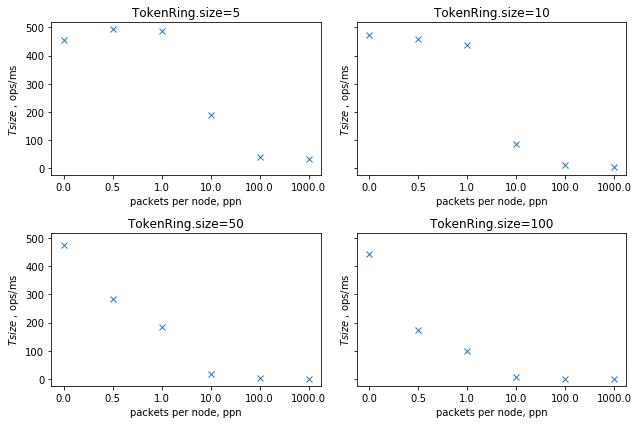

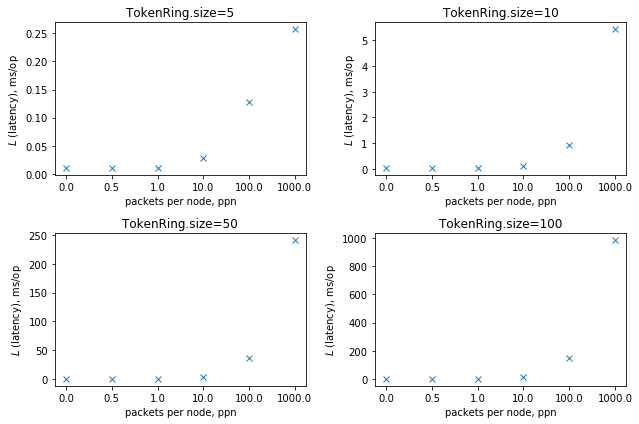

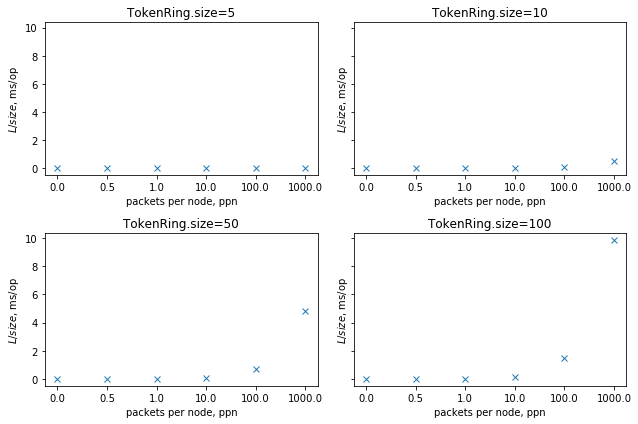

In [12]:
plot_many_tests_size(many_tests, yaxis='T', yaxislabel='$T$ (throughput), ops/ms', shareyaxis=False, imgname='many_sz_T')
plot_many_tests_size(many_tests, yaxis='T*size', yaxislabel='$T size$ , ops/ms', shareyaxis=True, imgname='many_sz_Tsize')
plot_many_tests_size(many_tests, yaxis='L', yaxislabel='$L$ (latency), ms/op', shareyaxis=False, imgname='many_sz_L')
plot_many_tests_size(many_tests, yaxis='L/size', yaxislabel='$L/size$, ms/op', shareyaxis=True, imgname='many_sz_Lsize')

In [13]:
def plot_many_tests_ppn(data, yaxis, yaxislabel, shareyaxis, imgname):
    def plot_many_tests_ppn(sp, ppn, data, yaxis, yaxislabel):
        tmp = data[data['ppn'] == ppn]
        
        x = tmp['size'].values
        ix = list(range(len(x)))
        y = tmp[yaxis].values
        
        sp.plot(ix, y, 'x')
        
        sp.xaxis.set_label_text('TokenRing.size')
        sp.xaxis.set_ticks(ix)
        sp.xaxis.set_ticklabels(x)
        sp.yaxis.set_label_text(yaxislabel)
        
        sp.set_title('ppn=%s' % ppn)
        
    
    f, sps = plt.subplots(2, 3, sharex=False, sharey=shareyaxis)
    
    f.set_figwidth(9)
    f.set_figheight(6)
    
    ppns = sorted(set(data['ppn']))
    
    for ind, ppn in enumerate(ppns):
        plot_many_tests_ppn(sps[ind // 3][ind % 3], ppn, data, yaxis, yaxislabel)
    
    plt.tight_layout()
    
    plt.savefig(imgname + '.pdf')
    
    plt.show()

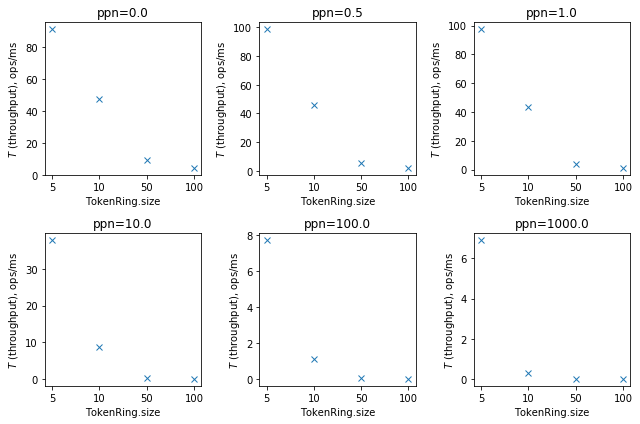

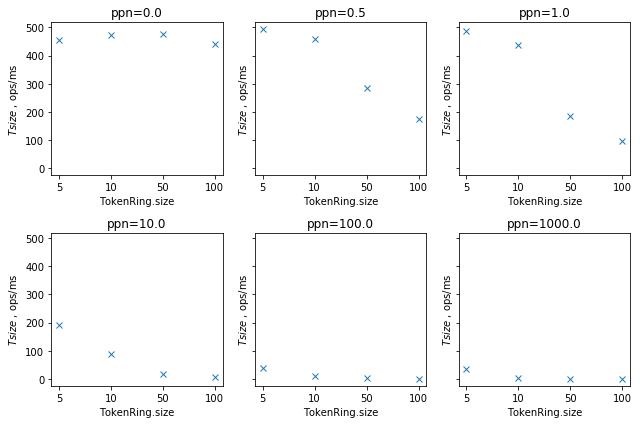

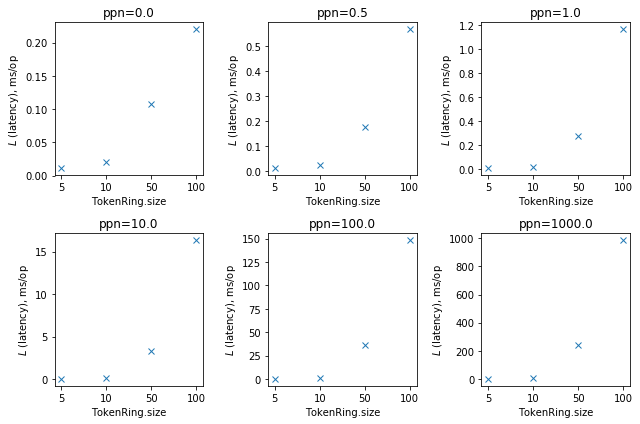

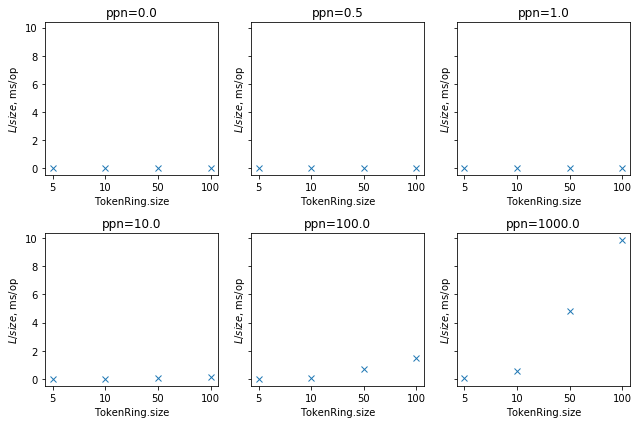

In [14]:
plot_many_tests_ppn(many_tests, yaxis='T', yaxislabel='$T$ (throughput), ops/ms', shareyaxis=False, imgname='many_ppn_T')
plot_many_tests_ppn(many_tests, yaxis='T*size', yaxislabel='$T size$ , ops/ms', shareyaxis=True, imgname='many_ppn_Tsize')
plot_many_tests_ppn(many_tests, yaxis='L', yaxislabel='$L$ (latency), ms/op', shareyaxis=False, imgname='many_ppn_L')
plot_many_tests_ppn(many_tests, yaxis='L/size', yaxislabel='$L/size$, ms/op', shareyaxis=True, imgname='many_ppn_Lsize')